In [1]:
import sys
sys.path.append('../')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import lxmls.readers.galton as galton
galton_data = galton.load()

## Simple Statistics on the Galton Dataset

In [3]:
x = galton_data[:, 0]
y = galton_data[:, 1]

assert(x.shape == y.shape)

In [4]:
np.ravel(galton_data)

array([ 70.5,  61.7,  68.5, ...,  73.7,  69.5,  73.7])

In [5]:
x_mean = x.mean()
x_std = x.std()

y_mean = y.mean()
y_std = y.std()

<function matplotlib.pyplot.grid>

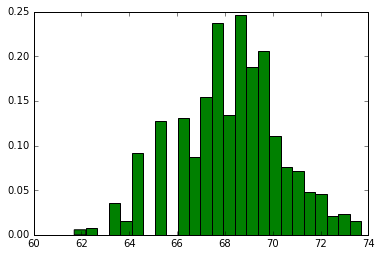

In [6]:
plt.hist(np.ravel(galton_data), 25, normed=1, facecolor='green')
plt.grid

### Jittering the Data Points

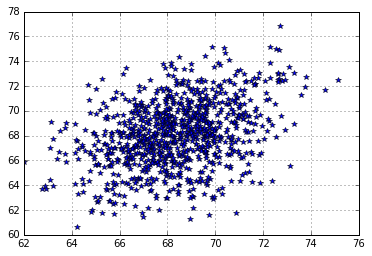

In [7]:
plt.plot(x + np.random.randn(len(x)), y + np.random.randn((len(y))), '*')
plt.grid()

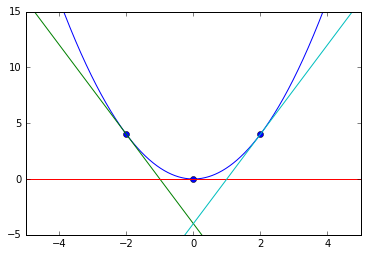

In [8]:
a = np.arange(-5, 5, 0.01)
f_x = np.power(a, 2)
plt.plot(a, f_x)
plt.xlim(-5, 5)
plt.ylim(-5, 15)
k= np.array([-2, 0, 2]) 
plt.plot(k, k**2, "bo") 
for i in k:
    plt.plot(a, (2*i)*a - (i**2))

## Introduction to Gradient Descent

In [9]:
def error(x, y, w):
    error = 0
    for i in range(0, len(x)):
        error = error + online_error(x[i], y[i], w)
    return error

def online_error(x, y, w):
    return (x * w - y) ** 2

In [10]:
def grad_error(x, y, w):
    grad_error = 0
    for i in range(0, len(x)):
        grad_error = grad_error + online_grad_error(x[i], y[i], w)
    return grad_error

def online_grad_error(x, y, w):
    return x * 2 *( x * w -  y)

In [11]:
def gd(x, y, w, learning_rate, precision):
    error_old = error(x, y, w)
    w_new = w - learning_rate * grad_error(x, y, w)
    error_new = error(x, y, w_new)
    return w_new, error_old, error_new

In [12]:
learning_rate = 0.00000001
precision = 0.0000001
max_epoch = 10000

In [13]:
w = 0.001
epoch = 0
error_old = error(x, y, w)
error_new = error_old + 2 * precision
while epoch <= max_epoch and abs(error_old - error_new) >= precision:
    w, error_old, error_new = gd(x, y, w, learning_rate, precision)
    epoch += 1
    print('Epoch %d / %d: Loss is %.4f.' % (epoch, max_epoch, error_new))

Epoch 1 / 10000: Loss is 3587418.5751.
Epoch 2 / 10000: Loss is 2993415.9339.
Epoch 3 / 10000: Loss is 2497905.2768.
Epoch 4 / 10000: Loss is 2084555.5805.
Epoch 5 / 10000: Loss is 1739743.6800.
Epoch 6 / 10000: Loss is 1452105.2765.
Epoch 7 / 10000: Loss is 1212160.3933.
Epoch 8 / 10000: Loss is 1012000.9353.
Epoch 9 / 10000: Loss is 845030.0539.
Epoch 10 / 10000: Loss is 705744.7285.
Epoch 11 / 10000: Loss is 589554.3981.
Epoch 12 / 10000: Loss is 492629.6658.
Epoch 13 / 10000: Loss is 411776.0897.
Epoch 14 / 10000: Loss is 344328.9003.
Epoch 15 / 10000: Loss is 288065.1755.
Epoch 16 / 10000: Loss is 241130.5774.
Epoch 17 / 10000: Loss is 201978.2371.
Epoch 18 / 10000: Loss is 169317.7731.
Epoch 19 / 10000: Loss is 142072.7630.
Epoch 20 / 10000: Loss is 119345.2666.
Epoch 21 / 10000: Loss is 100386.2319.
Epoch 22 / 10000: Loss is 84570.8078.
Epoch 23 / 10000: Loss is 71377.7499.
Epoch 24 / 10000: Loss is 60372.2420.
Epoch 25 / 10000: Loss is 51191.5648.
Epoch 26 / 10000: Loss is 4353